In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
import plotly.express as px

In [8]:
file_path = 'Wings/wing_init/output/wing_000_slices.dat'  # Replace with your file path
with open(file_path, 'r') as f:
    s = f.readlines()

In [9]:
# Find the lines where the zone data starts and ends
start = []
nzones=0

nnods = []
data = []
zcoords = []

for i, line in enumerate(s):
    if line.strip().startswith('DATAPACKING=POINT'):
        start.append(i+1)
        nnod = int(s[i-1].split('=')[1].split()[0])
        nnods.append(nnod)
        nzones += 1

        # Get zcoordinates
        z = float(s[i-2].split('=')[-1].split()[0][:-1])
        zcoords.append(z)

    else:
        continue

for ind, nnod in zip(start,nnods):
    slice_dat = np.genfromtxt(s[ind:ind+nnod], dtype=float)
    data.append(slice_dat)

zmax = max(zcoords)

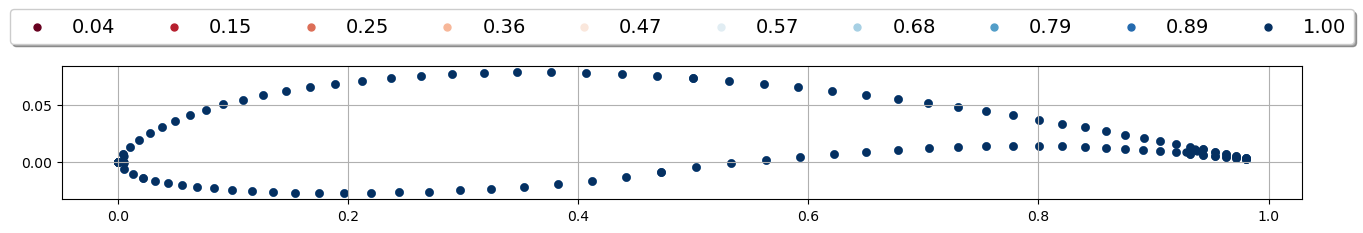

In [10]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot()

# Calculate the color for each dataset
cmap = plt.get_cmap('RdBu')
colors = [cmap(i) for i in np.linspace(0, 1, len(data))]

for color, dat, z in zip(colors, data, zcoords):
    x = dat[:,0]
    y = dat[:,1]
    vx = dat[:,6]
    vy = dat[:,7]
    p = dat[:,9]
    
    ax.scatter(x,y, color=color,s=25, label=f'{z/max(zcoords):.2f}')

ax.grid()
ax.set_aspect('equal')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
              ncol=min(len(data), len(data)), fancybox=True, shadow=True, fontsize=14)

# Set the azimuth and elevation angles
plt.savefig('coords.png')
plt.show()

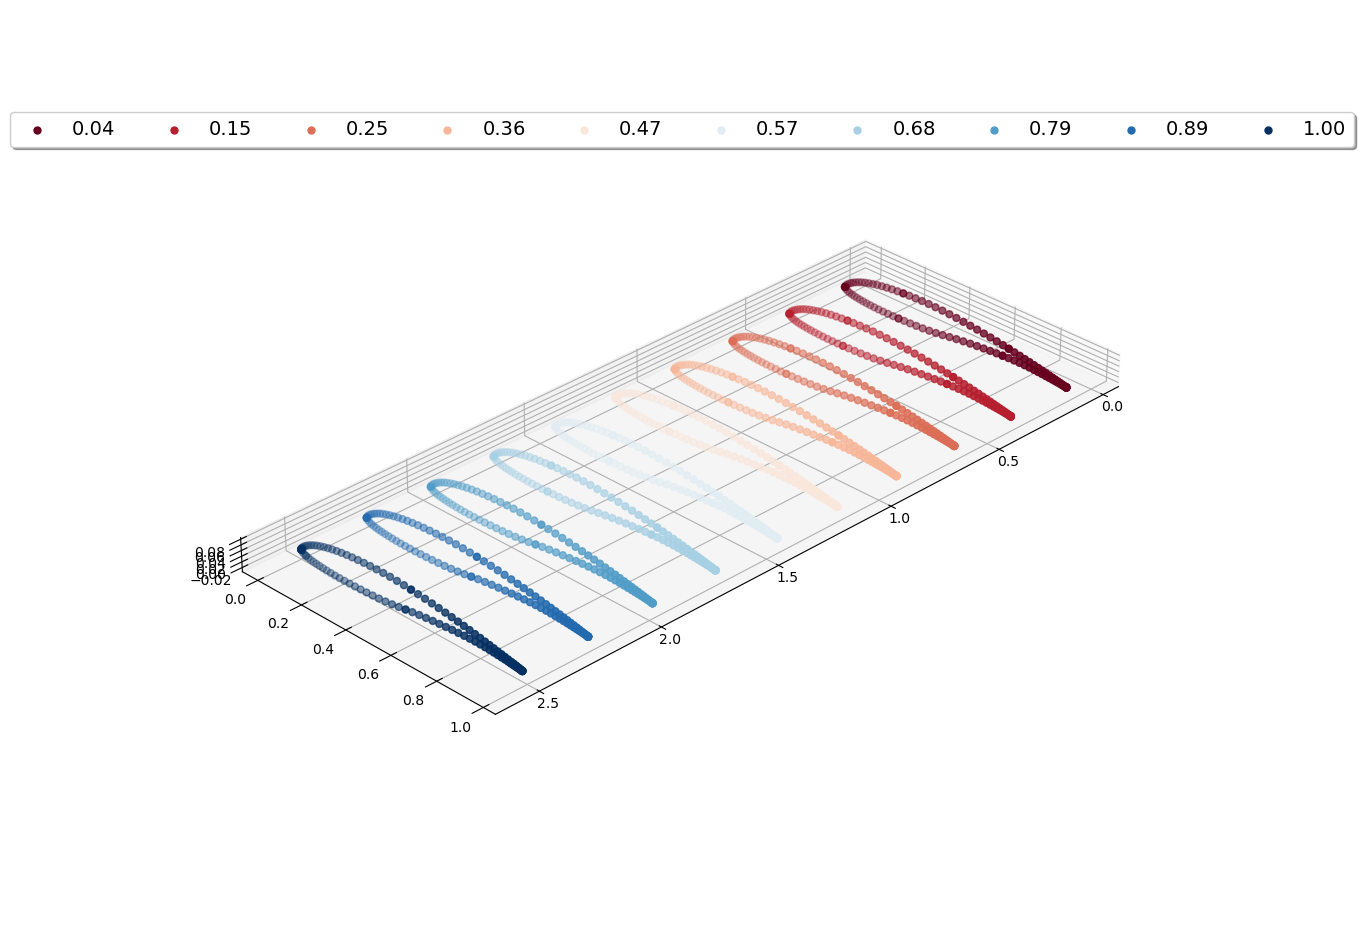

In [11]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection='3d')

# Calculate the color for each dataset
cmap = plt.get_cmap('RdBu')
colors = [cmap(i) for i in np.linspace(0, 1, len(data))]

for color, dat, z in zip(colors, data, zcoords):
    x = dat[:,0]
    y = dat[:,1]
    vx = dat[:,6]
    vy = dat[:,7]
    p = dat[:,9]
    
    ax.scatter(z*np.ones(x.shape), x,y, color=color,s=25, label=f'{z/max(zcoords):.2f}')

ax.grid()
ax.set_aspect('equal')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.9),
              ncol=min(len(data), len(data)), fancybox=True, shadow=True, fontsize=14)

# Set the azimuth and elevation angles
ax.view_init(azim=45, elev=30)
plt.savefig('coords.png')
plt.show()

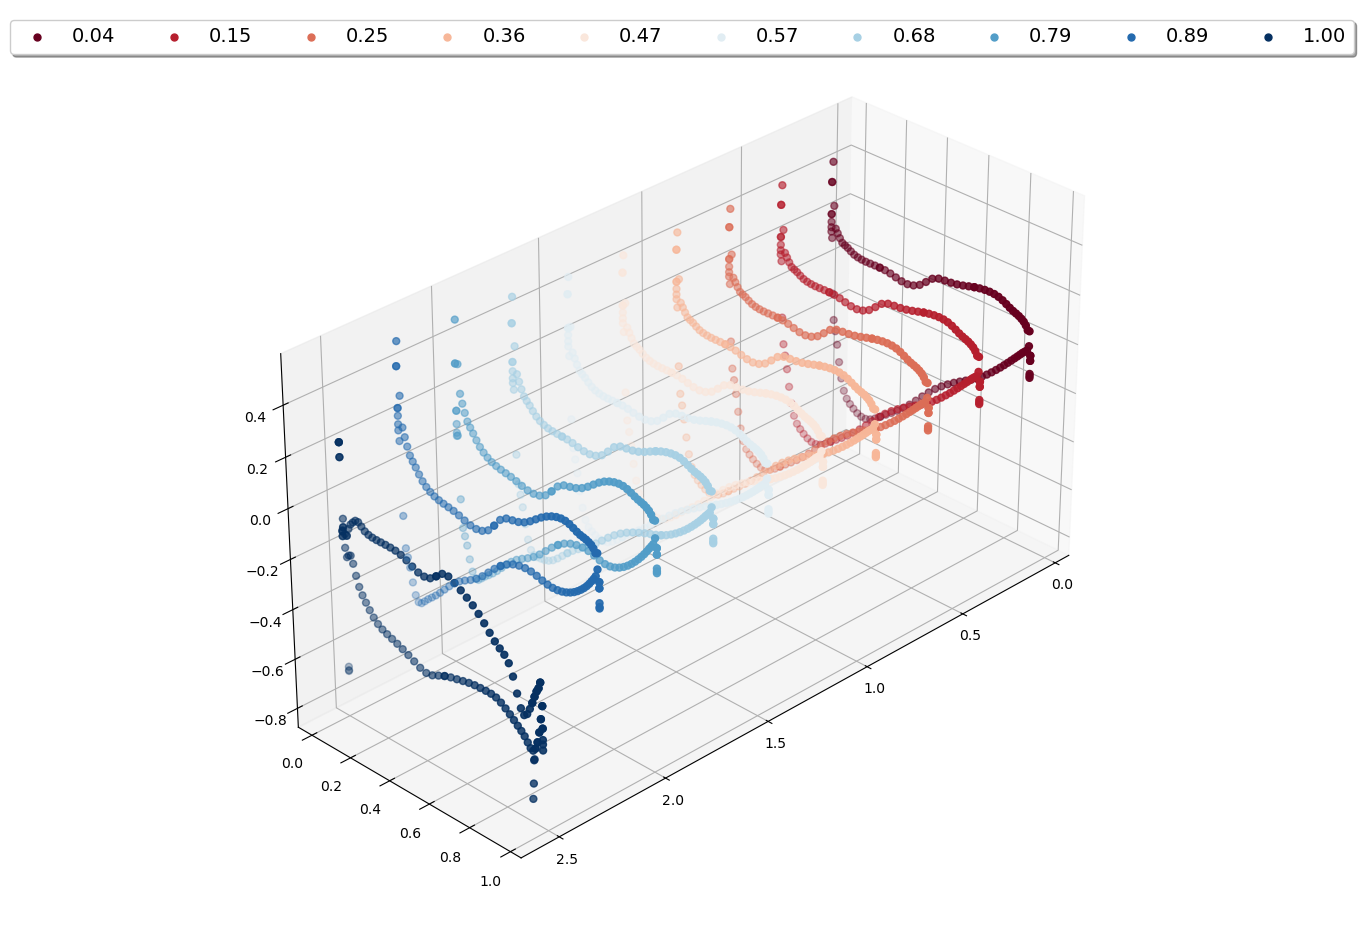

In [174]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection='3d')

# Calculate the color for each dataset
cmap = plt.get_cmap('RdBu')
colors = [cmap(i) for i in np.linspace(0, 1, len(data))]

for color, dat, z in zip(colors, data, zcoords):
    x = dat[:,0]
    y = dat[:,1]
    vx = dat[:,6]
    vy = dat[:,7]
    p = dat[:,9]
    
    ax.scatter(z*np.ones(x.shape), x, p/(p.max()-p.min()), color=color,s=25, label=f'{z/max(zcoords):.2f}')

ax.grid()
ax.set_aspect('equal')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0),
              ncol=min(len(data), len(data)), fancybox=True, shadow=True, fontsize=14)

# Set the azimuth and elevation angles
ax.view_init(azim=45, elev=30)
plt.savefig('pressure.png')
plt.show()

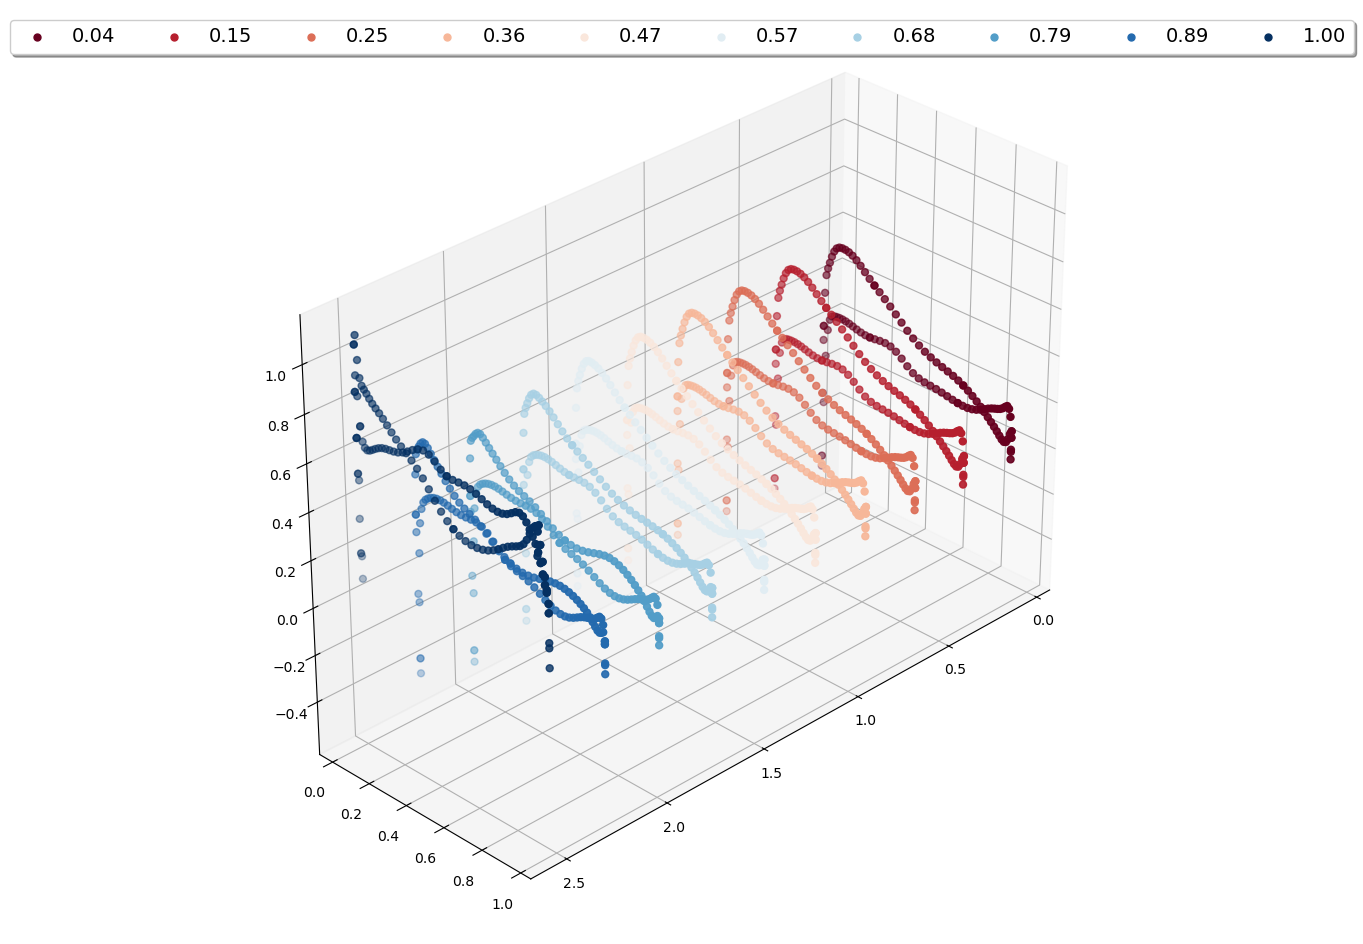

In [175]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection='3d')

# Calculate the color for each dataset
cmap = plt.get_cmap('RdBu')
colors = [cmap(i) for i in np.linspace(0, 1, len(data))]

for color, dat, z in zip(colors, data, zcoords):
    x = dat[:,0]
    y = dat[:,1]
    vx = dat[:,6]
    vy = dat[:,7]
    p = dat[:,9]
    
    ax.scatter(z*np.ones(x.shape), x, vx/(vx.max()-vx.min()), color=color,s=25, label=f'{z/max(zcoords):.2f}')

ax.grid()
ax.set_aspect('equal')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0),
              ncol=min(len(data), len(data)), fancybox=True, shadow=True, fontsize=14)

# Set the azimuth and elevation angles
ax.view_init(azim=45, elev=30)
plt.savefig('vx.png')
plt.show()

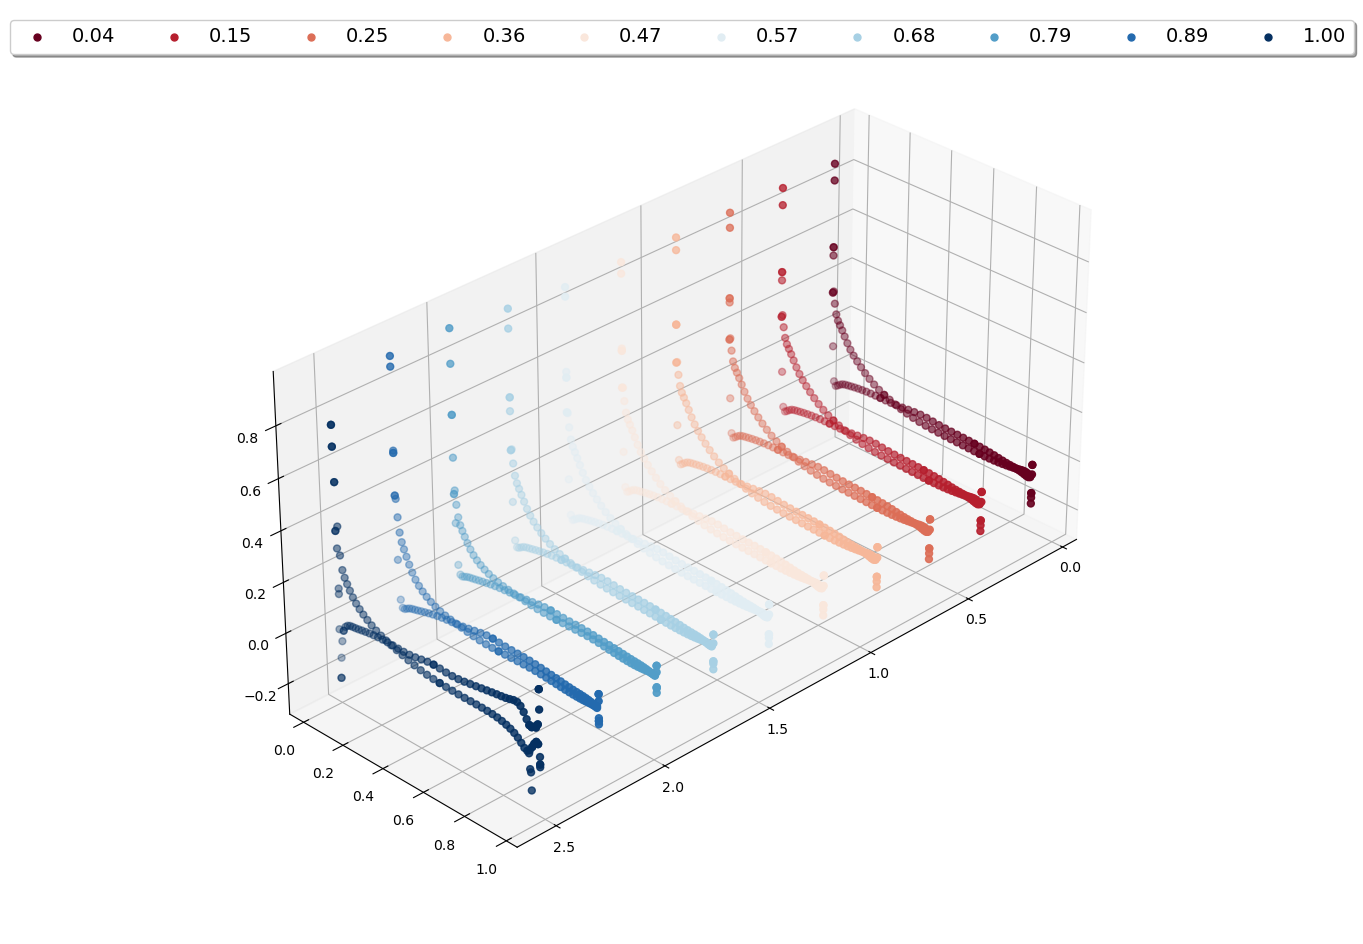

In [176]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection='3d')

# Calculate the color for each dataset
cmap = plt.get_cmap('RdBu')
colors = [cmap(i) for i in np.linspace(0, 1, len(data))]

for color, dat, z in zip(colors, data, zcoords):
    x = dat[:,0]
    y = dat[:,1]
    vx = dat[:,6]
    vy = dat[:,7]
    p = dat[:,9]
    
    ax.scatter(z*np.ones(x.shape), x, vy/(vy.max()-vy.min()), color=color,s=25, label=f'{z/max(zcoords):.2f}')

ax.grid()
ax.set_aspect('equal')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0),
              ncol=min(len(data), len(data)), fancybox=True, shadow=True, fontsize=14)

# Set the azimuth and elevation angles
ax.view_init(azim=45, elev=30)
plt.savefig('vy.png')
plt.show()

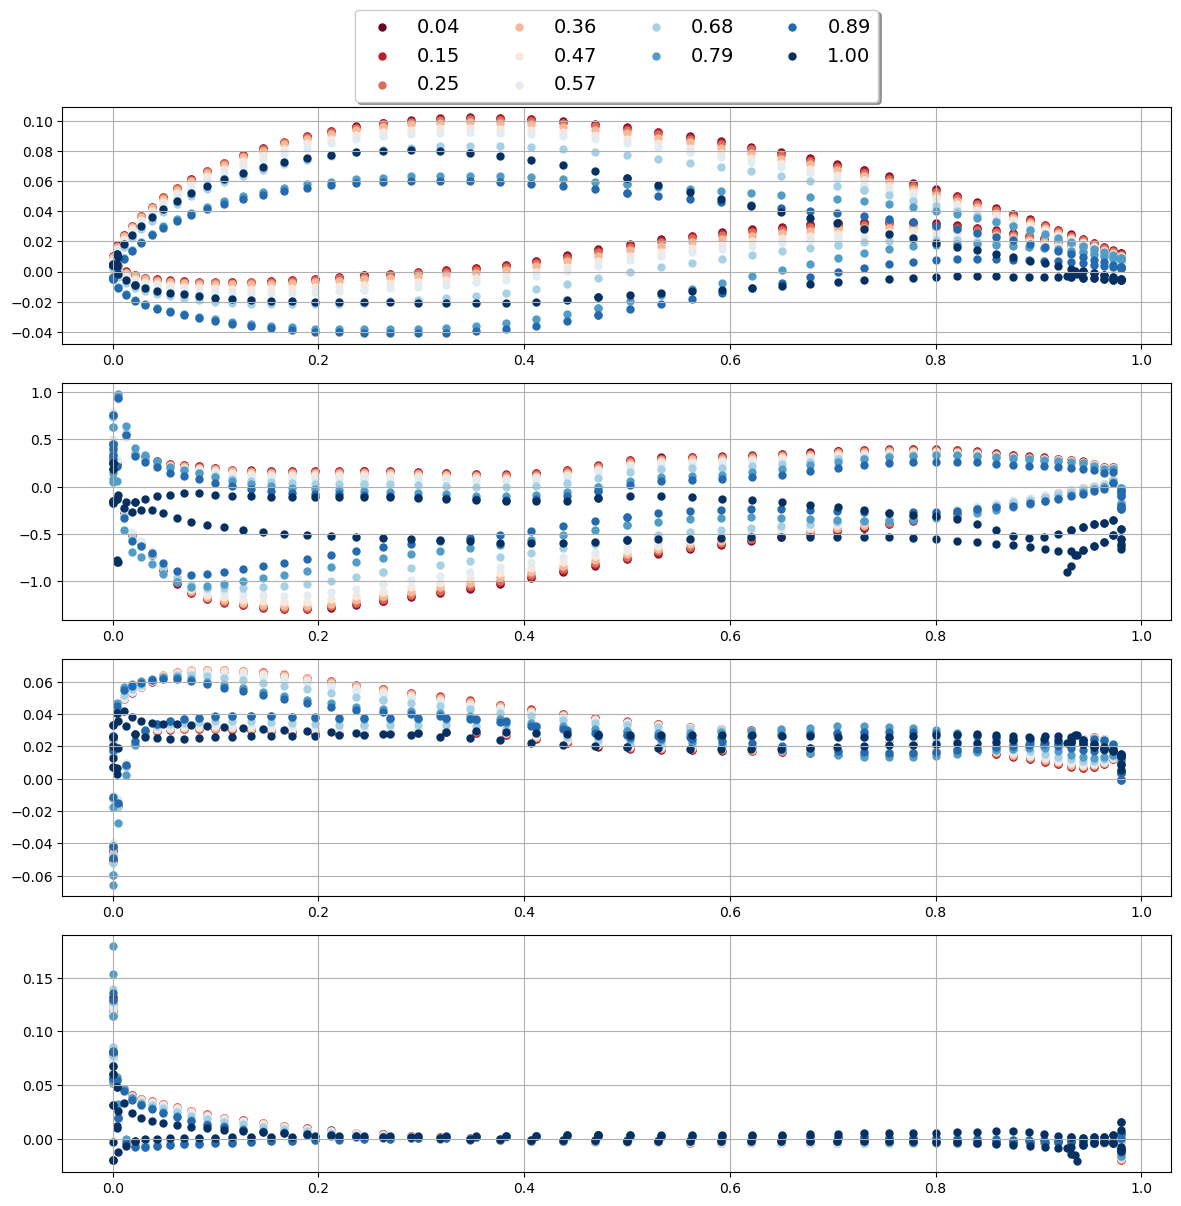

In [179]:
fig, axs = plt.subplots(nrows=4, ncols=1,figsize=(12,12), tight_layout=True)

# Calculate the color for each dataset
cmap = plt.get_cmap('RdBu')
colors = [cmap(i) for i in np.linspace(0, 1, len(data))]

for color, dat, z in zip(colors, data, zcoords):
    x = dat[:,0]
    y = dat[:,1]
    vx = dat[:,6]
    vy = dat[:,7]
    p = dat[:,9]

    axs[0].scatter(x,y,color=color,s=25, label=f'{z/max(zcoords):.2f}')
    axs[1].scatter(x,p,color=color,s=25)
    axs[2].scatter(x,vx,color=color,s=25)
    axs[3].scatter(x,vy,color=color,s=25)

for ax in axs:
    ax.grid()

axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.45),
              ncol=min(4, len(data)), fancybox=True, shadow=True, fontsize=14)
plt.show()

In [180]:
file_path = '2D/case_372/fc_000_slices.dat'  # Replace with your file path
with open(file_path, 'r') as f:
    s = f.readlines()

In [181]:
# Extract 2D surface data

for i, line in enumerate(s):
    if line.strip().startswith('DATAPACKING=POINT'):
        nnod = int(s[i-1].split('=')[1].split()[0].split(',')[0])
        nelm = int(s[i-1].split('=')[2].split()[0].split(',')[0])

        d2_dat = s[i+1:i+1+nnod]
        
        d2_dat = np.genfromtxt(d2_dat, dtype=float)

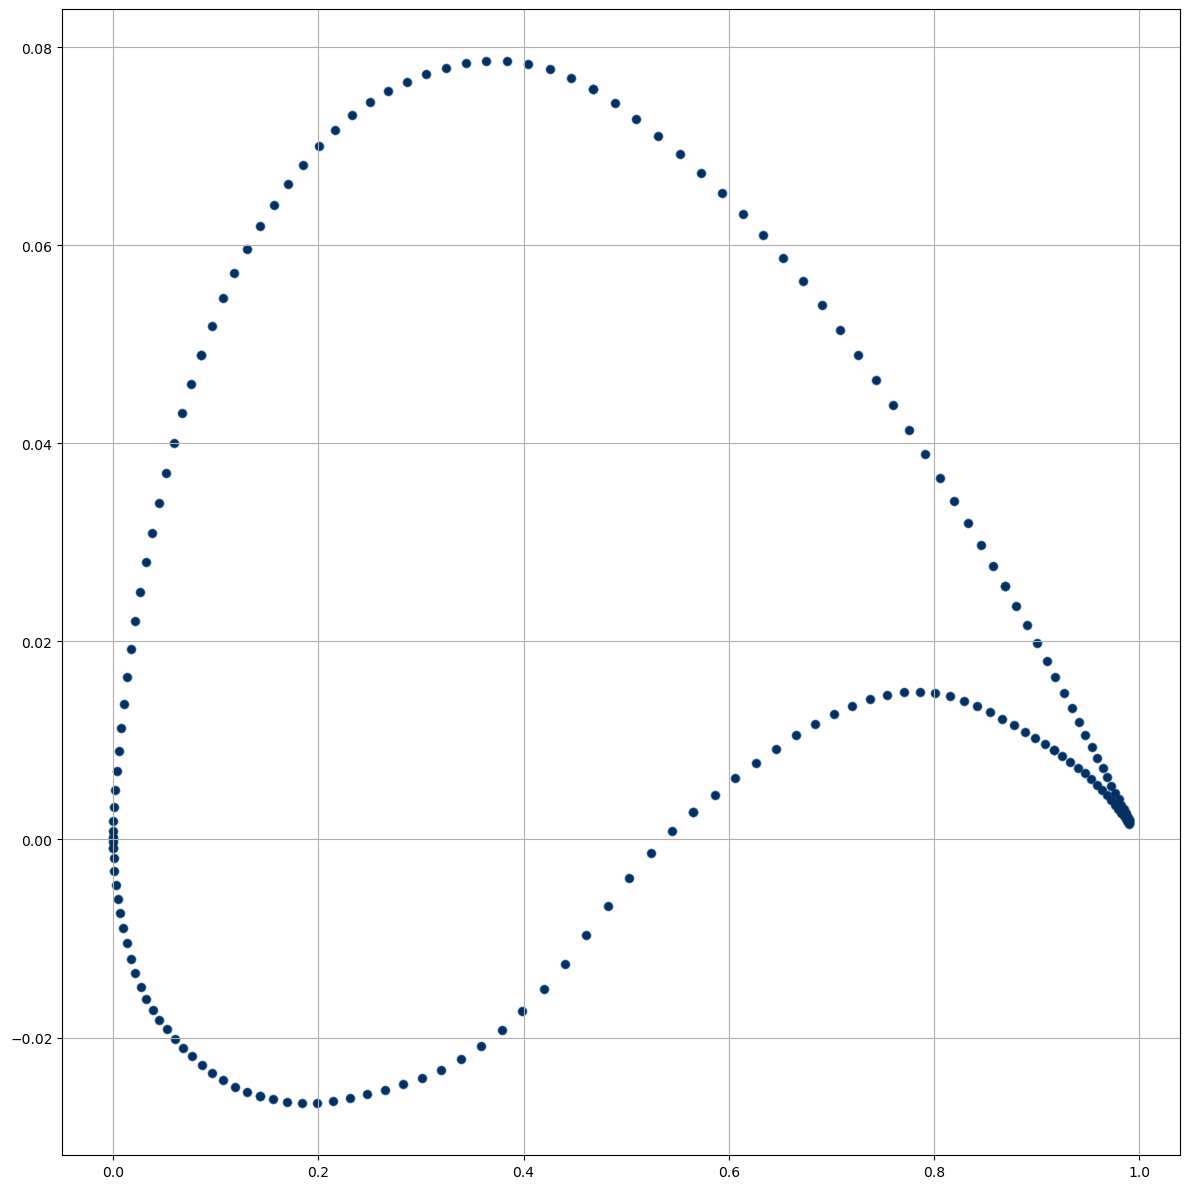

In [184]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(12,12), tight_layout=True)

ax.scatter(d2_dat[:,0], d2_dat[:,1])

for color, dat, z in zip(colors, data, zcoords):
    x = d2_dat[:,0]
    y = d2_dat[:,1]
    vx = d2_dat[:,6]
    vy = d2_dat[:,7]
    p = d2_dat[:,9]
    
    ax.scatter(x,y, color=color,s=25, label=f'{z/max(zcoords):.2f}')

ax.grid()
#ax.set_aspect('equal')

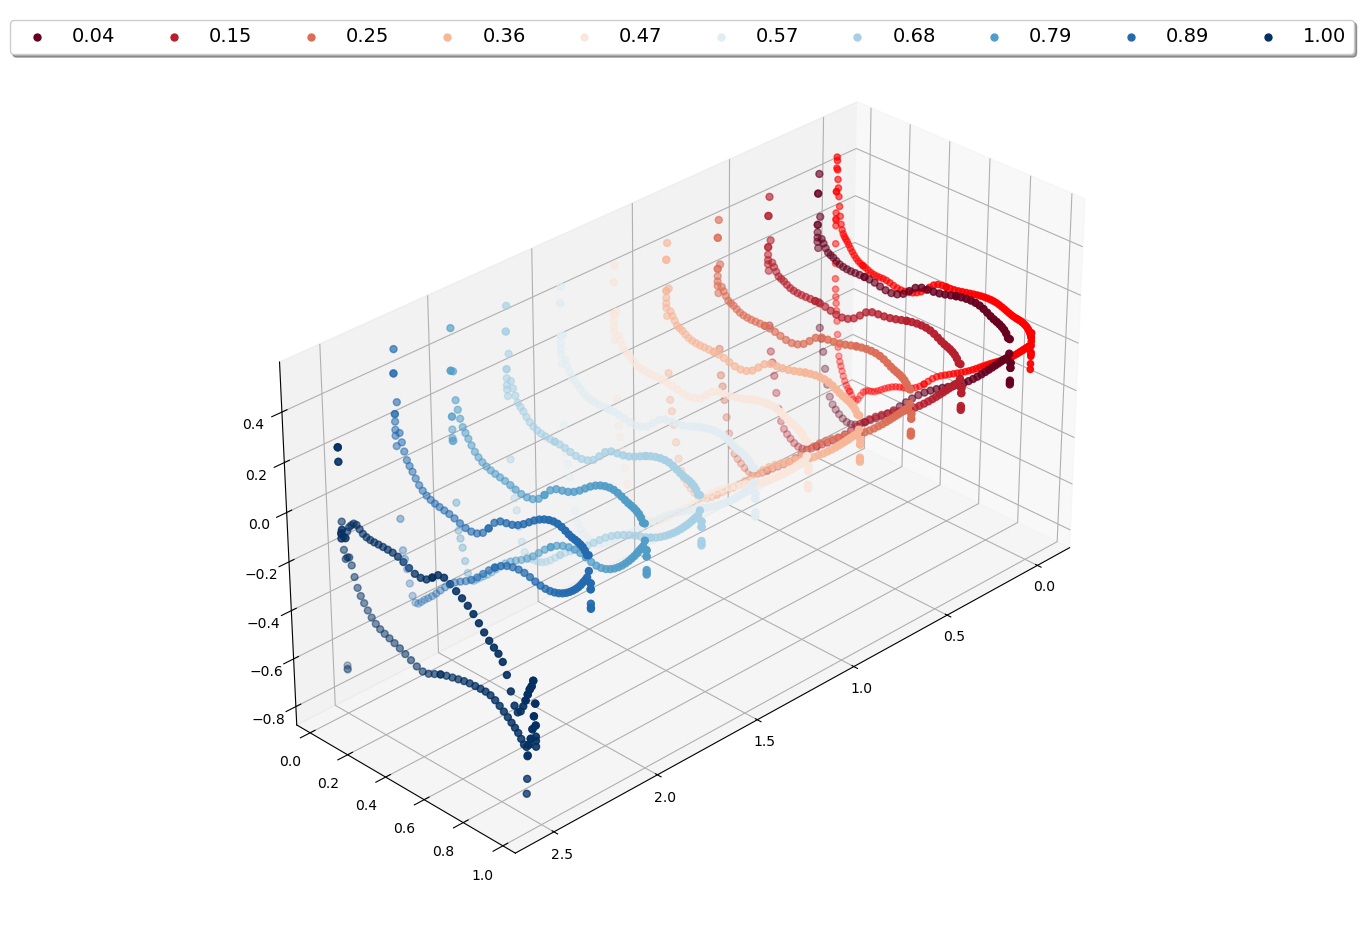

In [185]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection='3d')

# Calculate the color for each dataset
cmap = plt.get_cmap('RdBu')
colors = [cmap(i) for i in np.linspace(0, 1, len(data))]

for color, dat, z in zip(colors, data, zcoords):
    x = dat[:,0]
    y = dat[:,1]
    vx = dat[:,6]
    vy = dat[:,7]
    p = dat[:,9]
    
    ax.scatter(z*np.ones(x.shape), x, p/(p.max()-p.min()), color=color,s=25, label=f'{z/max(zcoords):.2f}')

ax.scatter(np.zeros(d2_dat[:,0].shape), d2_dat[:,0], d2_dat[:,-2]/(d2_dat[:,-2].max() - d2_dat[:,-2].min()), c='red')

ax.grid()
ax.set_aspect('equal')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0),
              ncol=min(len(data), len(data)), fancybox=True, shadow=True, fontsize=14)

# Set the azimuth and elevation angles
ax.view_init(azim=45, elev=30)
#plt.savefig('pressure.png')
plt.show()

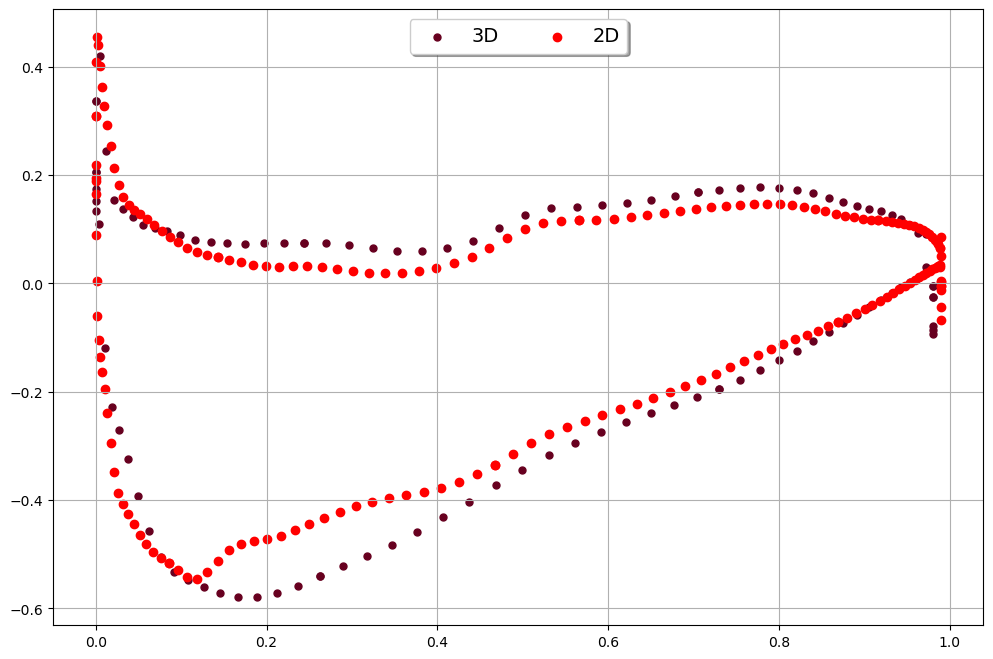

In [186]:
fig, ax = plt.subplots(figsize=(12,8))

dat = data[0]
x = dat[:,0]
y = dat[:,1]
vx = dat[:,6]
vy = dat[:,7]
p = dat[:,9]

ax.scatter(x, p/(p.max()-p.min()), s=25, color=colors[0], label='3D')

ax.scatter(d2_dat[:,0], d2_dat[:,-2]/(d2_dat[:,-2].max() - d2_dat[:,-2].min()), color='red', label='2D')

ax.grid()
#ax.set_aspect('equal')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0),
              ncol=min(len(data), len(data)), fancybox=True, shadow=True, fontsize=14)

# Set the azimuth and elevation angles
#plt.savefig('pressure.png')
plt.show()